In [2]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import warnings

# Ignore the warning message
warnings.filterwarnings("ignore", category=FutureWarning)

Dropout prediction model

<AxesSubplot:xlabel='Sentence', ylabel='Count'>

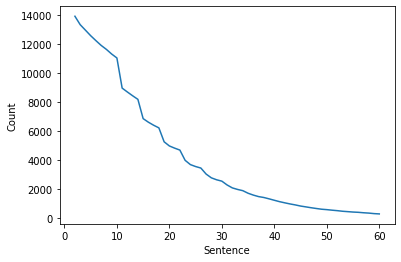

In [26]:
## get Count of Sentences for each matrice n

n = list(range(2, 61))
sentence_len = pd.DataFrame(columns=["Sentence", "Count"])

for x in n:
    path = (
        "../00_data/matrices_forte/matrix"
        + str(x)
        + ".pkl"
    )
    infile = open(path, "rb")
    get_length = pickle.load(infile)
    infile.close()
    l = len(get_length)
    sentence_len = sentence_len.append({"Sentence": x, "Count": l}, ignore_index=True)

sentence_len["Sentence"] = sentence_len["Sentence"].astype("int")
sentence_len["Count"] = sentence_len["Count"].astype("int")
sns.lineplot(data=sentence_len, x="Sentence", y="Count")

Count of user per subgroup

In [27]:
infile = open("../00_data/preprocessed_fairness_data.pkl", "rb")
df = pickle.load(infile)
infile.close()

# Parental Education Background
df.AbiEltern = df.AbiEltern.astype("float")
df_abi = df[df.AbiEltern > 0]
df_keinAbi = df[df.AbiEltern == 0]
df_weissnicht = df[df.AbiEltern.isnull()]
# Gender
df_boys = df[df.Sex__m == 1]
df_girls = df[df.Sex__w == 1]
# Migration
df_deutsch = df[df.eigSprache == 1]
df_migration = df[df.eigSprache == 0]
# HLE
df["Buecher"] = df["Buecher"].replace(["10"], 0)
df["Buecher"] = df["Buecher"].replace(["200"], 1)
df_buch0 = df[df.Buecher == 0.0]
df_buch1 = df[df.Buecher == 1]

In [28]:
## count of sentences per subgroup and n

group = [
    "abiEltern",
    "abiEltern",
    "gender",
    "gender",
    "erstsprache",
    "erstsprache",
    "buecher",
    "buecher",
]
subgroup = ["abi", "keinAbi", "boys", "girls", "deutsch", "migration", "buch0", "buch1"]
df_name = [
    df_abi,
    df_keinAbi,
    df_boys,
    df_girls,
    df_deutsch,
    df_migration,
    df_buch0,
    df_buch1,
]
sentence_len = pd.DataFrame(columns=["Sentence", "Count", "group", "subgroup"])
matrice = [
    "matrices_forte_abi",
    "matrices_forte_keinAbi",
    "matrices_forte_boys",
    "matrices_forte_girls",
    "matrices_forte_deutsch",
    "matrices_forte_migration",
    "matrices_forte_buecher_0",
    "matrices_forte_buecher_1",
]

for df_name, group, subgroup, matrice in zip(df_name, group, subgroup, matrice):
    n = list(range(2, 61))
    for x in n:
        path = (
            "../00_data/"
            + matrice
            +"/matrix"
            + str(x)
            + ".pkl"
        )
        infile = open(path, "rb")
        get_length = pickle.load(infile)
        l = len(get_length)
        sentence_len = sentence_len.append(
            {"Sentence": x, "Count": l, "group": group, "subgroup": subgroup},
            ignore_index=True,
        )

    sentence_len["Sentence"] = sentence_len["Sentence"].astype("int")
    sentence_len["Count"] = sentence_len["Count"].astype("int")

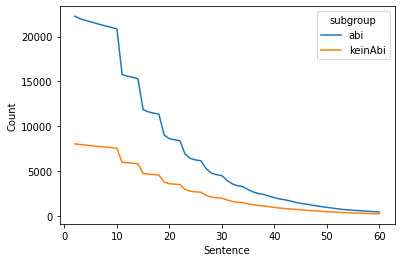

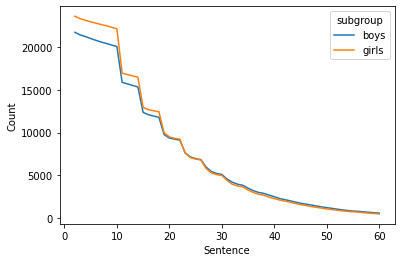

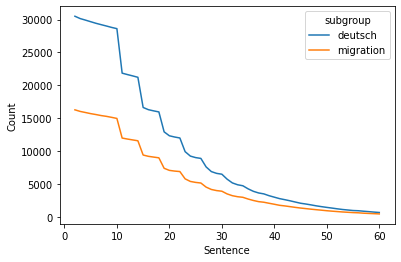

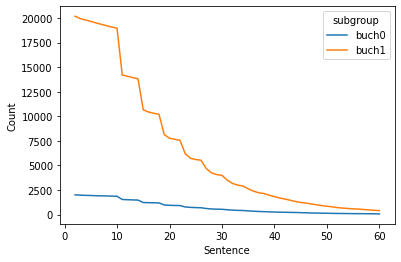

In [30]:
## plot
group = ["abiEltern", "gender", "erstsprache", "buecher"]

for x in group:
    df = sentence_len[sentence_len.group == x]
    sns.lineplot(data=df, x="Sentence", y="Count", hue="subgroup")
    plt.show()